In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv("ex2data1.csv", names = ["Exam 1","Exam 2","Admitted"])

In [15]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [16]:
X = data.iloc[:,[0,1]]
y = data.iloc[:,2]
X1 = np.append(np.matrix(np.ones(len(data))).transpose(),np.matrix(X),axis=1)
y1 = np.matrix(y).transpose()
theta = np.zeros((np.shape(X1)[1],1),dtype = int)

Text(0.5, 1.0, 'Scatter plot of Training data')

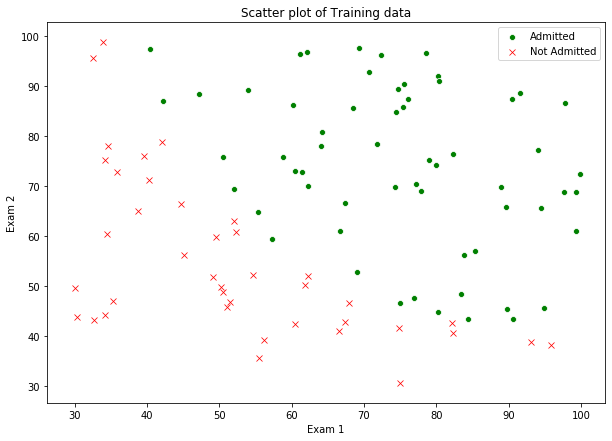

In [119]:
plt.figure(figsize = (10,7))
sns.scatterplot(data.iloc[:,0].loc[data['Admitted'] == 1], data.iloc[:,1].loc[data['Admitted'] == 1], color = 'g',
               label = 'Admitted', marker='o')
sns.scatterplot(data.iloc[:,0].loc[data['Admitted'] == 0], data.iloc[:,1].loc[data['Admitted'] == 0], color = 'r',
               label = 'Not Admitted',marker='x')
plt.title("Scatter plot of Training data")

In [5]:
#sigmoid function

def sigmoid(z):
    g = np.zeros(np.shape(z));
    g = 1/(1+np.exp(-z));
    return g
#    sigmoid = np.zeros([len(X),1])
#    for i in range(len(X)):
#        sigmoid[i,0] = 1/(1+math.exp(-X[i]))
    return sigmoid

In [10]:
#cost function and gradiant

def costfunction(theta,X,y):
    m = len(y)
    grad = np.zeros((np.shape(X)[1],1))
    predictions = X.dot(theta)
    cost = (1/m)*(np.sum((np.dot(-y.T,np.log(sigmoid(predictions))))) - 
                  (np.dot((1-y).T,np.log(1-(sigmoid(predictions))))))
    gradient = (1/m) * ((np.dot(X.T,(sigmoid(predictions)-y)))) 
    return cost,gradient

In [12]:
[Cost, Gradient] = costfunction(theta,X1,y1)

Gradient

matrix([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]])

In [112]:
def Normalise(X):
    norm = pd.DataFrame(np.zeros((len(X),len(X.columns))))
    for i in range(len(X.columns)):
        norm[norm.columns[i]] = (X[X.columns[i]] - np.mean(X[X.columns[i]]))/(np.std(X[X.columns[i]]))
    return norm

In [349]:
X_data = Normalise(X)

In [155]:
#Normalised inputs

X11 = np.append(np.matrix(np.ones(len(data))).transpose(),np.matrix(X_data),axis=1)
y11 = np.matrix(y).transpose()

#setting up the simulation conditions

iterations = 2000
alpha = 0.01

Text(0, 0.5, 'Normalised Exam 2 Score')

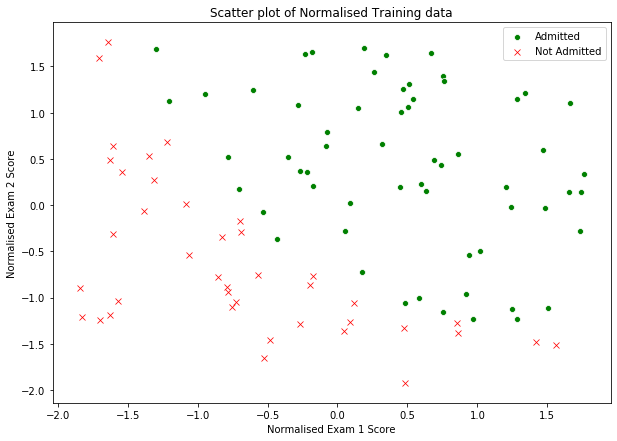

In [211]:
data_norm = pd.DataFrame(np.append(np.matrix(X_data),np.matrix(y).transpose(),axis=1))

plt.figure(figsize = (10,7))
sns.scatterplot(data_norm.iloc[:,0].loc[data['Admitted'] == 1], data_norm.iloc[:,1].loc[data['Admitted'] == 1], color = 'g',
               label = 'Admitted', marker='o')
sns.scatterplot(data_norm.iloc[:,0].loc[data['Admitted'] == 0], data_norm.iloc[:,1].loc[data['Admitted'] == 0], color = 'r',
               label = 'Not Admitted',marker='x')
plt.title("Scatter plot of Normalised Training data")
plt.xlabel("Normalised Exam 1 Score")
plt.ylabel("Normalised Exam 2 Score")

In [212]:
def gradient(theta,X,y,alpha,iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    theta_history = np.zeros((iterations,np.shape(X)[1]))
    for i in range(iterations):
        theta = theta - ((alpha/m) * ((np.dot(X.transpose(),((sigmoid(X.dot(theta)))-y)))))
        theta_history[i,:] = theta.transpose()
        cost_history[i] = costfunction(theta,X,y)
    return theta,theta_history,cost_history

In [213]:
[theta_ans,theta_hist,cost_hist] = gradient(theta,X11,y11,1,2000)

In [251]:
theta_ans

matrix([[1.71844426],
        [3.99277645],
        [3.72512571]])

Text(0, 0.5, 'Cost J($\\theta$)')

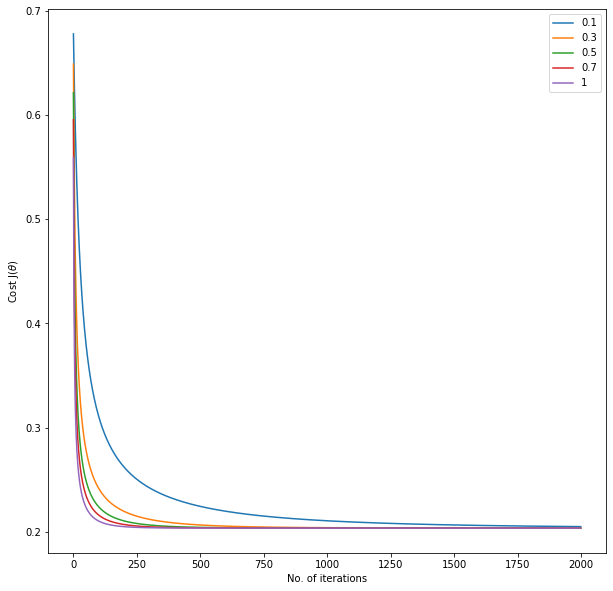

In [226]:
alphas = [0.1,0.3,0.5,0.7,1]
iterations = 2000
plt.figure(figsize = (10,10))
alpha_g = np.zeros((iterations,np.shape(X1)[1]))
for i in alphas:
    [theta_ans,theta_hist,cost_hist] = gradient(theta,X11,y11,i,iterations)
    plt.plot(range(2000), cost_hist[:2000], label = i)
plt.legend()
plt.xlabel("No. of iterations")
plt.ylabel(r"Cost J($\theta$)")

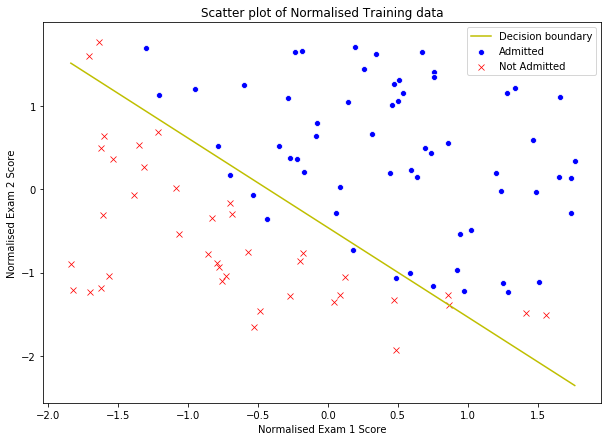

In [348]:
array_norm = np.append(np.matrix(X_data),np.matrix(y).transpose(),axis=1)
data_norm = pd.DataFrame(array_norm)


X_val = np.matrix(np.array(np.linspace(np.min(array_norm[:,0]),np.max(array_norm[:,0]),100))).T
y_val = np.matrix(np.zeros((X_val.shape)))
for i in range(len(X_val)):
    y_val[i] = -(theta_ans[0] +theta_ans[1]*X_val[i])/theta_ans[2]

    
plt.figure(figsize = (10,7))
sns.scatterplot(data_norm.iloc[:,0].loc[data['Admitted'] == 1], data_norm.iloc[:,1].loc[data['Admitted'] == 1], color = 'b',
               label = 'Admitted', marker='o')
sns.scatterplot(data_norm.iloc[:,0].loc[data['Admitted'] == 0], data_norm.iloc[:,1].loc[data['Admitted'] == 0], color = 'r',
               label = 'Not Admitted',marker='x')
plt.plot(X_val,y_val,"y",label = "Decision boundary")
plt.title("Scatter plot of Normalised Training data")
plt.xlabel("Normalised Exam 1 Score")
plt.ylabel("Normalised Exam 2 Score")
plt.legend()